# Capstone Project - The Battle of Neighborhoods

# Introduction: Business Problem <a name="Introduction: Business Problem"></a>

Let say a business firm would like to invest and open up Pizza restaurant in Toronto, Canada. 

I’m a Data Scientist handle this business request to come up with recommendations of possible best Pizza restaurant location in the Toronto city. And provide a report with more insight about various other influencing factors in the location for the business such as competitors, nearby shopping places and restaurants etc.

# Data <a name="Data"></a>

For the given business problem statement below data would be required for the analysis.

* Places around Toronto city
* Possible business options for "Dine" or "Take away" or "Delivery"
* Other pizza business competitors around that place
* And many more data clues would come up as we look into the Data Sources.

**Foursquare API** is used as primary Data source for this analysis. So, Let us go and explore the places around the Toronto. 

In [178]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

#!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

#!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

import matplotlib.pyplot as plt

import os
#os.environ['PROJ_LIB'] = 'C:/ProgramData/Anaconda3/Lib/site-packages/mpl_toolkits/basemap'

#!conda install -c conda-forge Basemap
from mpl_toolkits.basemap import Basemap
from pylab import rcParams
%matplotlib inline

print('Libraries imported.')

Libraries imported.


Let us establsh tihe connection with Data by Foursquare developer account.

In [179]:
CLIENT_ID = ''
CLIENT_SECRET = ''
VERSION = '20180604'
LIMIT = 30

In [180]:
#search, explore, trending
# Search for pizza shop and look around the location 
place = 'Toronto'

In [181]:
geolocator = Nominatim(user_agent="foursquare_agent")

def getGeoLocation(address):
    location = geolocator.geocode(address)
    return location.latitude, location.longitude

In [182]:
def searchVenue(search_query, address, radius):
    latitude, longitude = getGeoLocation(address)
    url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
    return url

In [183]:
url = searchVenue('pizza', place, 5000)
results = requests.get(url).json()

In [184]:
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
df = pd.json_normalize(venues)
df.head()

,id,name,categories,referralId,hasPerk,location.address,location.lat,location.lng,location.labeledLatLngs,location.distance,location.postalCode,location.cc,location.city,location.state,location.country,location.formattedAddress,location.crossStreet,location.neighborhood
0,4b2438f6f964a520126424e3,Pizza Pizza,"[{'id': '4bf58dd8d48988d1ca941735', 'name': 'P...",v-1588544829,False,260 CHURCH STREET,43.656513,-79.377242,"[{'label': 'display', 'lat': 43.65651263631174...",635,M5B 1Z2,CA,Toronto,ON,Canada,"[260 CHURCH STREET, Toronto ON M5B 1Z2, Canada]",NaN,NaN
1,552ff1d1498e5f41b0ccb3bd,Mamma's Pizza,"[{'id': '4bf58dd8d48988d1ca941735', 'name': 'P...",v-1588544829,False,127 Yonge St,43.650891,-79.378632,"[{'label': 'display', 'lat': 43.650891, 'lng':...",515,M5C 1W4,CA,Toronto,ON,Canada,"[127 Yonge St, Toronto ON M5C 1W4, Canada]",NaN,NaN
2,4ca62112f47ea14380845d21,Pizza 2 Go,"[{'id': '4bf58dd8d48988d1ca941735', 'name': 'P...",v-1588544829,False,65 Front St. W,43.646090,-79.379776,"[{'label': 'display', 'lat': 43.64608978691595...",888,M5J,CA,Toronto,ON,Canada,"[65 Front St. W (Union Station), Toronto ON M5...",Union Station,NaN
3,4af5d885f964a520b2fd21e3,Amato Pizza,"[{'id': '4bf58dd8d48988d1ca941735', 'name': 'P...",v-1588544829,False,429A Yonge St,43.660215,-79.382571,"[{'label': 'display', 'lat': 43.66021482917061...",757,NaN,CA,Toronto,ON,Canada,"[429A Yonge St (at College St), Toronto ON, Ca...",at College St,NaN
4,4b7f161bf964a5206e1530e3,Pizza Nova,"[{'id': '4bf58dd8d48988d1ca941735', 'name': 'P...",v-1588544829,False,371 Front Street W,43.643272,-79.391836,"[{'label': 'display', 'lat': 43.64327168873745...",1302,M5V 3S8,CA,Toronto,ON,Canada,"[371 Front Street W (at Blue Jay Way), Toronto...",at Blue Jay Way,NaN


In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         29 non-null     object 
 1   name                       29 non-null     object 
 2   categories                 29 non-null     object 
 3   referralId                 29 non-null     object 
 4   hasPerk                    29 non-null     bool   
 5   location.address           28 non-null     object 
 6   location.lat               29 non-null     float64
 7   location.lng               29 non-null     float64
 8   location.labeledLatLngs    29 non-null     object 
 9   location.distance          29 non-null     int64  
 10  location.postalCode        22 non-null     object 
 11  location.cc                29 non-null     object 
 12  location.city              29 non-null     object 
 13  location.state             29 non-null     object 
 

In [186]:
df.shape

(29, 18)

In [187]:
df['name']

0                                Pizza Pizza
1                              Mamma's Pizza
2                                 Pizza 2 Go
3                                Amato Pizza
4                                 Pizza Nova
5             Pizza Rustica Restaurant & Bar
6                               Boston Pizza
7                              Mamma's Pizza
8               St. Lawrence Pizza and Pasta
9                              Express Pizza
10                          Olympic 76 Pizza
11                               Pizza Pizza
12                             Mamma's Pizza
13                                 241 Pizza
14                                 241 Pizza
15                               Pizza Pizza
16       Papa Ceo Fine Italian Foods & Pizza
17                                 Pizzaiolo
18                               Pizza Pizza
19                               Pizza Pizza
20    Classic italian style pizza food truck
21                               Pizza Pizza
22        

In [188]:
df_pizza = df[['name', 'location.lat', 'location.lng', 'location.distance', 'location.postalCode']]
df_pizza.columns = ['Name', 'Latitude', 'Longitude', 'Distance', 'PostalCode' ]
df_pizza

,Name,Latitude,Longitude,Distance,PostalCode
0,Pizza Pizza,43.656513,-79.377242,635,M5B 1Z2
1,Mamma's Pizza,43.650891,-79.378632,515,M5C 1W4
2,Pizza 2 Go,43.646090,-79.379776,888,M5J
3,Amato Pizza,43.660215,-79.382571,757,NaN
4,Pizza Nova,43.643272,-79.391836,1302,M5V 3S8
5,Pizza Rustica Restaurant & Bar,43.644919,-79.391844,1146,M5V 3P5
6,Boston Pizza,43.644059,-79.388815,1120,M5V 3G5
7,Mamma's Pizza,43.647943,-79.395647,1127,NaN
8,St. Lawrence Pizza and Pasta,43.648378,-79.371578,1146,M5E 1C3
9,Express Pizza,43.663787,-79.380224,1185,M4Y 2C5


In [223]:
df_pizza.describe()

,Latitude,Longitude,Distance
count,29.000000,29.000000,29.000000
mean,43.654933,-79.383958,1207.344828
std,0.008617,0.013286,762.311770
min,43.639049,-79.411218,271.000000
25%,43.648290,-79.391107,616.000000
50%,43.654622,-79.384149,1127.000000
75%,43.660215,-79.378632,1618.000000
max,43.676129,-79.350955,3227.000000


Unfortunately, there are not much information from location.neighborhood

In [189]:
url = searchVenue('restaurant', place, 5000)
results = requests.get(url).json()

In [190]:
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
df = pd.json_normalize(venues)
df.head()

,id,name,categories,referralId,hasPerk,location.address,location.lat,location.lng,location.labeledLatLngs,location.distance,location.postalCode,location.cc,location.city,location.state,location.country,location.formattedAddress,location.crossStreet,venuePage.id,location.neighborhood
0,4ad4c05ff964a52048f720e3,Hemispheres Restaurant & Bistro,"[{'id': '4bf58dd8d48988d14e941735', 'name': 'A...",v-1588544849,False,110 Chestnut Street,43.654884,-79.385931,"[{'label': 'display', 'lat': 43.65488413420439...",224,M5G 1R3,CA,Toronto,ON,Canada,"[110 Chestnut Street, Toronto ON M5G 1R3, Canada]",NaN,NaN,NaN
1,4aef8854f964a5201cd921e3,Aroma Fine Indian Restaurant,"[{'id': '4bf58dd8d48988d10f941735', 'name': 'I...",v-1588544849,False,287 King St. W,43.646463,-79.389644,"[{'label': 'display', 'lat': 43.64646252150344...",906,M5V 1J5,CA,Toronto,ON,Canada,"[287 King St. W (at John St.), Toronto ON M5V ...",at John St.,NaN,NaN
2,4ada5d5bf964a520e92121e3,The Hot House Restaurant & Bar,"[{'id': '4bf58dd8d48988d14e941735', 'name': 'A...",v-1588544849,False,35 Church St,43.648824,-79.373702,"[{'label': 'display', 'lat': 43.64882370529773...",973,M5E 1T3,CA,Toronto,ON,Canada,"[35 Church St (at Front St E), Toronto ON M5E ...",at Front St E,NaN,NaN
3,4ad4c05cf964a52006f620e3,Victoria's Restaurant,"[{'id': '4bf58dd8d48988d1c4941735', 'name': 'R...",v-1588544849,False,37 King Street East,43.649298,-79.376431,"[{'label': 'display', 'lat': 43.64929834396347...",763,M5C 1E9,CA,Toronto,ON,Canada,[37 King Street East (at Le Meridien King Edwa...,at Le Meridien King Edward Hotel,498556908,NaN
4,5750b013498e755287c6de97,Some Time BBQ Grill Restaurant 碳烤屋,"[{'id': '52af3b773cf9994f4e043c03', 'name': 'S...",v-1588544849,False,988 Baldwin Street,43.655874,-79.393826,"[{'label': 'display', 'lat': 43.655874, 'lng':...",839,NaN,CA,Toronto,ON,Canada,"[988 Baldwin Street, Toronto ON, Canada]",NaN,NaN,NaN


In [191]:
df_restaur = df[['name', 'location.lat', 'location.lng', 'location.distance', 'location.postalCode']]
df_restaur.columns = ['Name', 'Latitude', 'Longitude', 'Distance', 'PostalCode' ]
df_restaur

,Name,Latitude,Longitude,Distance,PostalCode
0,Hemispheres Restaurant & Bistro,43.654884,-79.385931,224,M5G 1R3
1,Aroma Fine Indian Restaurant,43.646463,-79.389644,906,M5V 1J5
2,The Hot House Restaurant & Bar,43.648824,-79.373702,973,M5E 1T3
3,Victoria's Restaurant,43.649298,-79.376431,763,M5C 1E9
4,Some Time BBQ Grill Restaurant 碳烤屋,43.655874,-79.393826,839,NaN
5,Sky Dragon Chinese Restaurant 龍翔酒樓,43.652783,-79.398174,1149,NaN
6,North-East Chinese Restaurant 華北美食,43.653185,-79.396677,1026,NaN
7,Studio Restaurant,43.661500,-79.379319,966,M5B
8,Azure Restaurant & Bar,43.644749,-79.385113,976,M5V 2X3
9,Green Tea Restaurant Downtown,43.652488,-79.397501,1098,M5T 2E3


In [224]:
df_restaur.describe()

,Latitude,Longitude,Distance
count,30.000000,30.000000,30.000000
mean,43.652799,-79.389424,1027.833333
std,0.006810,0.009050,469.165002
min,43.641479,-79.403493,189.000000
25%,43.648942,-79.398140,855.750000
50%,43.652793,-79.389504,1120.500000
75%,43.655323,-79.385065,1242.000000
max,43.670342,-79.369485,1966.000000


In [192]:
url = searchVenue('shopping', place, 5000)
results = requests.get(url).json()

In [193]:
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
df = pd.json_normalize(venues)
df_shopping = df[['name', 'location.lat', 'location.lng', 'location.distance', 'location.postalCode']]
df_shopping.columns = ['Name', 'Latitude', 'Longitude', 'Distance', 'PostalCode' ]
df_shopping

,Name,Latitude,Longitude,Distance,PostalCode
0,Dragon City Shopping Mall 龍城,43.652774,-79.398222,1153,M5T 3A5
1,Saks Fifth Avenue Club - Personal Shopping,43.651810,-79.379192,424,M5C 2L7
2,CF Toronto Eaton Centre,43.654540,-79.380677,287,M5B 2H1
3,"QR Code Shopping, Best of the Best Selling!",43.660964,-79.429725,3780,M6H 1M1
4,TD Centre Shopping Concourse,43.647184,-79.380932,741,M5K 1A1
5,Shopping Basket,43.689219,-79.340836,5279,M4J
6,Last Minute Shopping,43.642740,-79.412871,2619,NaN
7,Galleria Shopping Centre,43.667592,-79.442053,4936,M6H 2A6
8,Sancardia Shopping Centre,43.678378,-79.358412,3450,NaN
9,Upper Oakville Shopping Centre Head Office,43.654294,-79.340546,3495,M4M 2M3


In [225]:
df_shopping.describe()

,Latitude,Longitude,Distance
count,12.000000,12.000000,12.000000
mean,43.659679,-79.383462,2590.500000
std,0.013860,0.034172,1775.076413
min,43.642740,-79.442053,287.000000
25%,43.650847,-79.401884,1047.750000
50%,43.654417,-79.380805,3034.500000
75%,43.667868,-79.354326,3774.000000
max,43.689219,-79.340546,5279.000000


Now we have below Data sources for our analysis in Toronto around the 5000m radius

* Pizza shops
* Restaurants
* shopping places

# Methodology <a name="Methodology"></a>

Let us find out a methodology for this particular business problem falls under whether predictive, descriptive, or classification model.

The business problem deals with more of statistics analysis which would fall under an analytic approach methodology. DBSCAN classification algorithm might be suitable since it applies to density of restaurants in the Toronto city.  DBSCAN stands for Density-Based Spatial Clustering of Applications with Noise. This technique is one of the most common clustering algorithms which works based on density of object. The whole idea is that if a particular point belongs to a cluster, it should be near to lots of other points in that cluster.

It works based on two parameters: Epsilon and Minimum Points.

* ‘Epsilon’ determines a specified radius that if includes enough number of points within, we call it dense area
* ‘minimumSamples’ determines the minimum number of data points we want in a neighbourhood to define a cluster.

Let us clean the data and model the clustering algorithm.

In [194]:
df_data = df_pizza.append(df_restaur.append(df_shopping , sort = False), sort = False)

In [195]:
df_data

,Name,Latitude,Longitude,Distance,PostalCode
0,Pizza Pizza,43.656513,-79.377242,635,M5B 1Z2
1,Mamma's Pizza,43.650891,-79.378632,515,M5C 1W4
2,Pizza 2 Go,43.646090,-79.379776,888,M5J
3,Amato Pizza,43.660215,-79.382571,757,NaN
4,Pizza Nova,43.643272,-79.391836,1302,M5V 3S8
...,...,...,...,...,...
7,Galleria Shopping Centre,43.667592,-79.442053,4936,M6H 2A6
8,Sancardia Shopping Centre,43.678378,-79.358412,3450,NaN
9,Upper Oakville Shopping Centre Head Office,43.654294,-79.340546,3495,M4M 2M3
10,Riverdale Shopping Centre,43.668694,-79.342070,3772,M4K 3J1


In [196]:
bins = np.linspace(min(df_pizza['Distance']), max(df_pizza['Distance']), 4)
group_names = ["Near from Centre", "Mid from Centre", "Far from Centre"]
df_pizza['Distance-bin'] = pd.cut(df_pizza['Distance'], bins, labels = group_names, include_lowest=True)

df_pizza.head()

,Name,Latitude,Longitude,Distance,PostalCode,Distance-bin
0,Pizza Pizza,43.656513,-79.377242,635,M5B 1Z2,Near from Centre
1,Mamma's Pizza,43.650891,-79.378632,515,M5C 1W4,Near from Centre
2,Pizza 2 Go,43.646090,-79.379776,888,M5J,Near from Centre
3,Amato Pizza,43.660215,-79.382571,757,NaN,Near from Centre
4,Pizza Nova,43.643272,-79.391836,1302,M5V 3S8,Mid from Centre


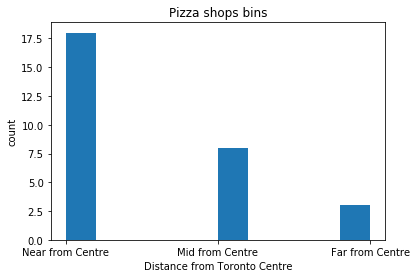

In [197]:
plt.hist(df_pizza['Distance-bin'])
#plt.bar(group_names, df_pizza["Distance-bin"].value_counts())

plt.xlabel("Distance from Toronto Centre")
plt.ylabel("count")
plt.title("Pizza shops bins")
plt.show()

In [198]:
df_pizza.groupby('PostalCode')
df_pizza
#pd.get_dummies(df_pizza['PostalCode'])

,Name,Latitude,Longitude,Distance,PostalCode,Distance-bin
0,Pizza Pizza,43.656513,-79.377242,635,M5B 1Z2,Near from Centre
1,Mamma's Pizza,43.650891,-79.378632,515,M5C 1W4,Near from Centre
2,Pizza 2 Go,43.646090,-79.379776,888,M5J,Near from Centre
3,Amato Pizza,43.660215,-79.382571,757,NaN,Near from Centre
4,Pizza Nova,43.643272,-79.391836,1302,M5V 3S8,Mid from Centre
5,Pizza Rustica Restaurant & Bar,43.644919,-79.391844,1146,M5V 3P5,Near from Centre
6,Boston Pizza,43.644059,-79.388815,1120,M5V 3G5,Near from Centre
7,Mamma's Pizza,43.647943,-79.395647,1127,NaN,Near from Centre
8,St. Lawrence Pizza and Pasta,43.648378,-79.371578,1146,M5E 1C3,Near from Centre
9,Express Pizza,43.663787,-79.380224,1185,M4Y 2C5,Near from Centre


In [199]:
pdf = df_data[["Name", "PostalCode", "Latitude","Longitude", "Distance"]]
pdf.dropna(axis = 0, inplace = True)
pdf = pdf.reset_index(drop=True)
pdf.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Name,PostalCode,Latitude,Longitude,Distance
0,Pizza Pizza,M5B 1Z2,43.656513,-79.377242,635
1,Mamma's Pizza,M5C 1W4,43.650891,-79.378632,515
2,Pizza 2 Go,M5J,43.646090,-79.379776,888
3,Pizza Nova,M5V 3S8,43.643272,-79.391836,1302
4,Pizza Rustica Restaurant & Bar,M5V 3P5,43.644919,-79.391844,1146


In [200]:
pdf.describe()

,Latitude,Longitude,Distance
count,55.000000,55.000000,55.000000
mean,43.655032,-79.385574,1394.909091
std,0.009080,0.018298,1121.626585
min,43.641479,-79.442053,189.000000
25%,43.648601,-79.397770,660.500000
50%,43.653866,-79.385207,1146.000000
75%,43.659071,-79.378912,1495.500000
max,43.689219,-79.340546,5279.000000


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  from ipykernel import kernelapp as app
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


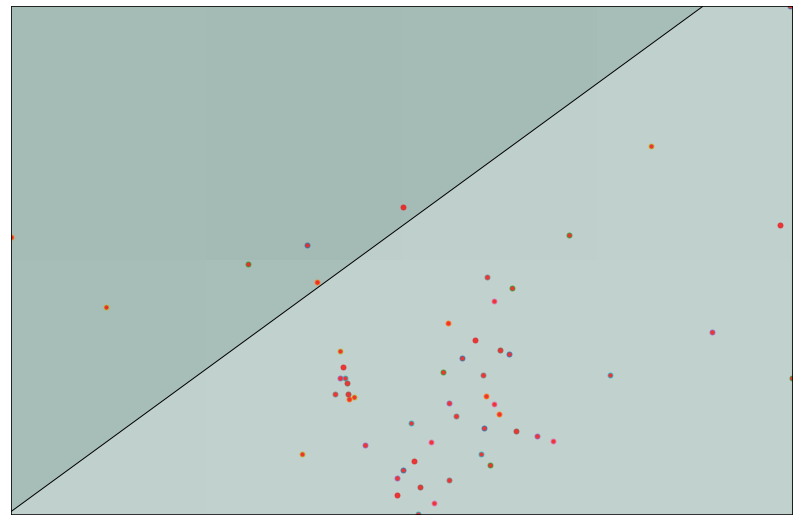

In [201]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = (14,10)

llon= pdf['Longitude'].min()
ulon= pdf['Longitude'].max()
llat= pdf['Latitude'].min()
ulat= pdf['Latitude'].max()

my_map = Basemap(projection='merc',
            resolution = 'l', area_thresh = 1000.0,
            llcrnrlon=llon, llcrnrlat=llat,
            urcrnrlon=ulon, urcrnrlat=ulat)

my_map.drawcoastlines()
my_map.drawcountries()
my_map.fillcontinents(color = 'white', alpha = 0.3)
my_map.shadedrelief()

xs,ys = my_map(np.asarray(pdf.Longitude), np.asarray(pdf.Latitude))
pdf['xm']= xs.tolist()
pdf['ym'] =ys.tolist()

for index,row in pdf.iterrows():
   my_map.plot(row.xm, row.ym,markerfacecolor =([1,0,0]),  marker='o', markersize= 5, alpha = 0.75)
plt.show()

In [212]:
from sklearn.cluster import DBSCAN
import sklearn.utils
from sklearn.preprocessing import StandardScaler
sklearn.utils.check_random_state(1000)
Clus_dataSet = pdf[['xm','ym', 'Distance',]]
#Clus_dataSet = pdf[['Longitude','Latitude', 'Distance']]
Clus_dataSet = np.nan_to_num(Clus_dataSet)
Clus_dataSet = StandardScaler().fit_transform(Clus_dataSet)

# Compute DBSCAN
db = DBSCAN(eps=0.30).fit(Clus_dataSet)
#db = DBSCAN(eps=0.5, min_samples=10).fit(Clus_dataSet)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
pdf["Clus_Db"]=labels

realClusterNum=len(set(labels)) - (1 if -1 in labels else 0)
clusterNum = len(set(labels)) 

pdf[["Name", "PostalCode", "Latitude","Longitude", "Distance","Clus_Db"]].head(5)

,Name,PostalCode,Latitude,Longitude,Distance,Clus_Db
0,Pizza Pizza,M5B 1Z2,43.656513,-79.377242,635,-1
1,Mamma's Pizza,M5C 1W4,43.650891,-79.378632,515,2
2,Pizza 2 Go,M5J,43.646090,-79.379776,888,-1
3,Pizza Nova,M5V 3S8,43.643272,-79.391836,1302,0
4,Pizza Rustica Restaurant & Bar,M5V 3P5,43.644919,-79.391844,1146,0


In [213]:
set(labels)

{-1, 0, 1, 2}

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  # Remove the CWD from sys.path while we load stuff.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  del sys.path[0]


Cluster 0 Avg Latitude: 43.643807122770376 Avg Longitude: -79.38926415543223 Avg Distance from City centre: 1176.142857142857
Cluster 1 Avg Latitude: 43.65388485137302 Avg Longitude: -79.39868101759104 Avg Distance from City centre: 1198.0
Cluster 2 Avg Latitude: 43.652366886753086 Avg Longitude: -79.38075625721406 Avg Distance from City centre: 345.6


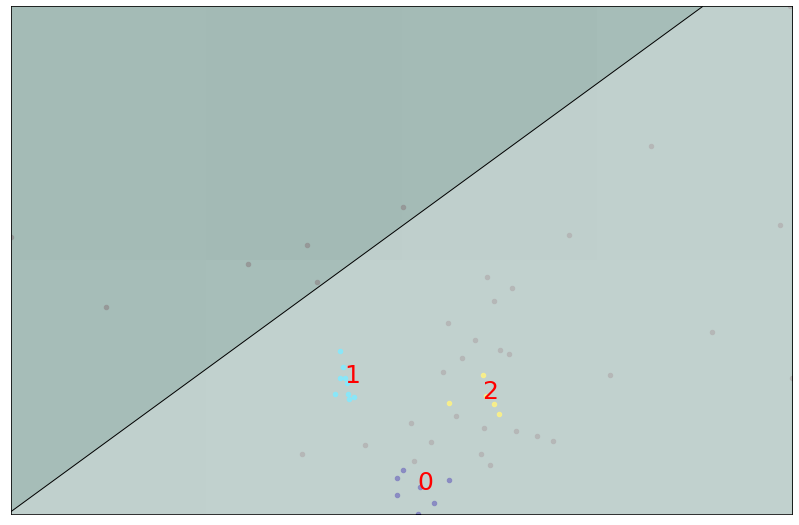

In [219]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = (14,10)

my_map = Basemap(projection='merc',
            resolution = 'l', area_thresh = 1000.0,
            llcrnrlon=llon, llcrnrlat=llat,
            urcrnrlon=ulon, urcrnrlat=ulat)

my_map.drawcoastlines()
my_map.drawcountries()
#my_map.drawmapboundary()
my_map.fillcontinents(color = 'white', alpha = 0.3)
my_map.shadedrelief()

# To create a color map
colors = plt.get_cmap('jet')(np.linspace(0.0, 1.0, clusterNum))

for clust_number in set(labels):
    c=(([0.4,0.4,0.4]) if clust_number == -1 else colors[np.int(clust_number)])
    clust_set = pdf[pdf.Clus_Db == clust_number]                    
    my_map.scatter(clust_set.xm, clust_set.ym, color =c,  marker='o', s= 20, alpha = 0.85)
    if clust_number != -1:
        cenx=np.mean(clust_set.xm) 
        ceny=np.mean(clust_set.ym) 
        plt.text(cenx,ceny,str(clust_number), fontsize=25, color='red',)
        print ("Cluster "+str(clust_number), 'Avg Latitude: ' + str(np.mean(clust_set.Latitude)), \
               'Avg Longitude: ' + str(np.mean(clust_set.Longitude)),
               'Avg Distance from City centre: ' + str(np.mean(clust_set.Distance)) )

In [222]:
pdf[pdf.Name.str.contains('pizza', case=False)]

,Name,PostalCode,Latitude,Longitude,Distance,xm,ym,Clus_Db
0,Pizza Pizza,M5B 1Z2,43.656513,-79.377242,635,7206.677278,2310.222068,-1
1,Mamma's Pizza,M5C 1W4,43.650891,-79.378632,515,7052.072463,1446.261615,2
2,Pizza 2 Go,M5J,43.646090,-79.379776,888,6924.907160,708.451823,-1
3,Pizza Nova,M5V 3S8,43.643272,-79.391836,1302,5583.871725,275.417811,0
4,Pizza Rustica Restaurant & Bar,M5V 3P5,43.644919,-79.391844,1146,5583.008285,528.575420,0
5,Boston Pizza,M5V 3G5,43.644059,-79.388815,1120,5919.728730,396.370115,0
6,St. Lawrence Pizza and Pasta,M5E 1C3,43.648378,-79.371578,1146,7836.484394,1060.137288,-1
7,Express Pizza,M4Y 2C5,43.663787,-79.380224,1185,6875.027010,3428.348949,-1
8,Pizza Pizza,M6J 1E8,43.647116,-79.404152,1775,4214.383173,866.130024,-1
9,241 Pizza,M5A 2Z1,43.654622,-79.364211,1593,8655.580386,2019.681581,-1


# Results <a name="Results"></a> 

The result of DBSCAN algorithm grouped the venues around 300m close to each other’s and grouped as different clusters. While looking the cluster data further, we could understand in that how many pizza shops are around that clusters. This means that there are more happening places in that location. If the number of pizza shops are less, then there is good chance to launch a pizza shop in that place.

|Cluster|Latitude|Longitude|Distance from City centre|No Pizza shop competitors|
|-------|--------|---------|-------------------------|-------------------------|
|0|43.643|-79.389|1176.14|3|
|1|43.653|-79.398|1198.0|0|	
|2|43.652|-79.380|345.6|1|

# Discussion <a name="Discussion"></a>

DBSCAN algorithm also points out the places which are not dense which is call outliner. These places could be considered for home delivery and take away etc., 

Also need to note that mean distance of current pizza shops are around 1207.344 meters from city centre. This give an idea about how the competitors are strategically running their business.

This analysis could be further enhanced by collecting the further data from each of the venues based on ratings, feedbacks.


# Conclusion <a name="Conclusion"></a>

The analysis of places in the Toronto city using the Foursquare API given good insight about business opportunities. Especially the classification algorithms helped to create clusters to focus on potential business area for launching the pizza shops in the Toronto city.
Let us present the report to stakeholders for business decision making.